In [52]:
import pandas as pd

In [53]:
data = pd.read_excel('table.xlsx')
data.head()

,День,Время,Что делал
0,16.0,08:30 - 10:30,Изучал шаблоны проектирования компонентов Vue
1,NaN,"10:30 - 14:00, \n14:30 - 15:30",Изучал архитектурные решения для фронтенда
2,NaN,15:30 - 17:20,Делал фильтр колонок в списке нарушений
3,17.0,08:30 - 11:30,Переделал фильтр в соответствии с исходной зад...
4,NaN,13:30 - 16:00,Доделал мелкие правки по задаче


In [54]:
# Заполним пропуски в днях
new_days = []

for day in data['День']:
    if not pd.isna(day):
        tmp_day = day
    new_days.append(tmp_day)
    
data['День'] = new_days
data.head()

,День,Время,Что делал
0,16.0,08:30 - 10:30,Изучал шаблоны проектирования компонентов Vue
1,16.0,"10:30 - 14:00, \n14:30 - 15:30",Изучал архитектурные решения для фронтенда
2,16.0,15:30 - 17:20,Делал фильтр колонок в списке нарушений
3,17.0,08:30 - 11:30,Переделал фильтр в соответствии с исходной зад...
4,17.0,13:30 - 16:00,Доделал мелкие правки по задаче


In [55]:
# добавим к каждой строчке отработанное время
time_in_minutes = []
for working_period_string in data['Время']:
    periods = working_period_string.split(", \n")
    time_sum = 0
    for p in periods:
        start_str = p.split(' - ')[0]
        end_str = p.split(' - ')[1]
        
        start_minutes = int(start_str.split(':')[0]) * 60 + int(start_str.split(':')[1])
        end_minutes = int(end_str.split(':')[0]) * 60 + int(end_str.split(':')[1])
        
        time_sum += end_minutes - start_minutes
        
    time_in_minutes.append(time_sum)
        
data['Время в минутах'] = time_in_minutes
data.head()

,День,Время,Что делал,Время в минутах
0,16.0,08:30 - 10:30,Изучал шаблоны проектирования компонентов Vue,120
1,16.0,"10:30 - 14:00, \n14:30 - 15:30",Изучал архитектурные решения для фронтенда,270
2,16.0,15:30 - 17:20,Делал фильтр колонок в списке нарушений,110
3,17.0,08:30 - 11:30,Переделал фильтр в соответствии с исходной зад...,180
4,17.0,13:30 - 16:00,Доделал мелкие правки по задаче,150


In [60]:
# Теперь соберём данные по дням, чтобы нарисовать сводный график
plot_data_dict = {}
for day, time in zip(data['День'], data['Время в минутах']):
    if day not in plot_data_dict.keys():
        plot_data_dict[day] = time
    else:
        plot_data_dict[day] += time
        
# Разделим график на норму и переработку
normal_minutes_per_day = 480
overtime_data = {}
normal_data = {}

for key, value in plot_data_dict.items():
    if value > normal_minutes_per_day:
        overtime_data[key] = value - normal_minutes_per_day
        normal_data[key] = normal_minutes_per_day
    else:
        overtime_data[key] = 0
        normal_data[key] = value
        
        
        
plot_data = pd.DataFrame()
plot_data['day'] = normal_data.keys()
plot_data['time'] = normal_data.values()
plot_data['overtime'] = overtime_data.values()
plot_data.head()

,day,time,overtime
0,16.0,480,20
1,17.0,480,0
2,18.0,480,230


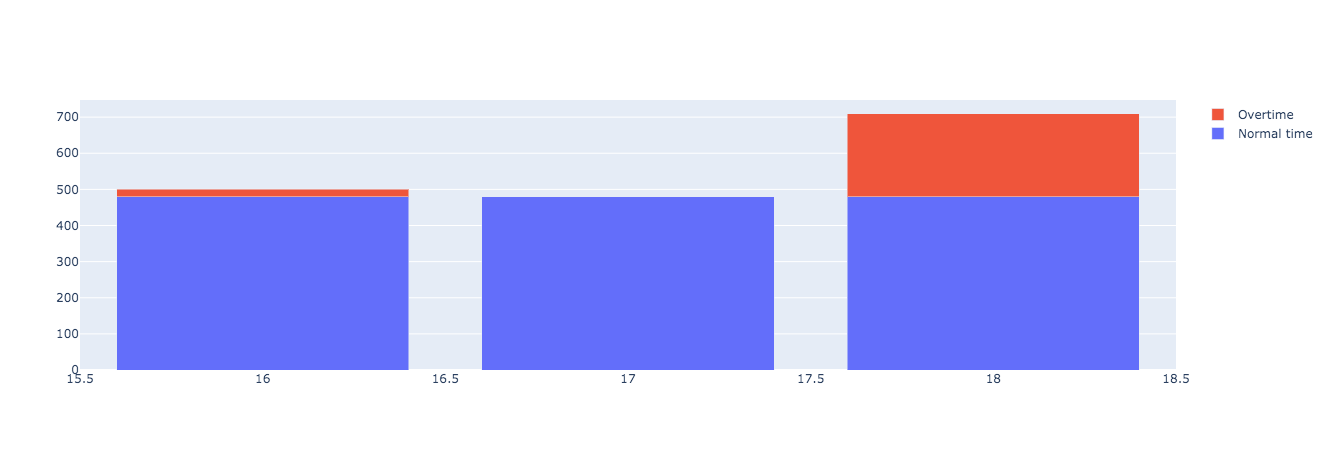

In [62]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Normal time', x=plot_data['day'], y=plot_data['time']),
    go.Bar(name='Overtime', x=plot_data['day'], y=plot_data['overtime'])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()